In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [2]:
# Load in the dataframe
df = pd.read_csv("#IkoKaziKe-tweets.csv", index_col=0)

In [3]:
# Looking at first 5 rows of the dataset, with important details
df[["Username", "Tweet", "Date", "Time", "Retweets", "Favorites"]].head()

,Username,Tweet,Date,Time,Retweets,Favorites
0,iNjangiru,Back to school is here. Stock duka!! Dm for pr...,2019-12-30,10:48,2,2
1,KevinCWachez,OFFER! OFFER! OFFER! Air Force 1 white Sizes 4...,2019-12-30,05:40,4,5
2,I_Am_Ednas,Am a videographer/photographer and i also edit...,2019-12-29,12:48,7,13
3,beth_kasinga,Looking for this bag in #nairobi #IkoKaziKE #i...,2019-12-29,10:59,2,3
4,Wanjikuesther12,#IkoKaziKE #KOTLoyalsNiSisi,2019-12-28,08:04,1,3


In [4]:
# Sort values by retweets and favorites - view top 5
df[["Username", "Tweet", "Date", "Time", "Retweets", "Favorites"]].sort_values(by=["Retweets", "Favorites"], ascending=False).head()

,Username,Tweet,Date,Time,Retweets,Favorites
106,muchina_sherry,I went to the market early last week and creat...,2019-11-30,11:12,444,1285
1160,kevocklax,Let's help @Chakku_ get a job to be able to su...,2019-03-17,06:40,305,180
189,menteh_,"I believe Retweets are powerful, any leads to ...",2019-11-18,15:25,285,86
1046,ian_ochii,Hello #KOT I sell shoe suede cleaners. All col...,2019-04-21,14:04,241,258
792,abadan_katan,"Someone..anyone, looking for a job in Accounti...",2019-07-01,14:13,193,158


In [5]:
# Sort values by retweets and favorites - view bottom 5
df[["Username", "Tweet", "Date", "Time", "Retweets", "Favorites"]].sort_values(by=["Retweets", "Favorites"], ascending=False).tail()

,Username,Tweet,Date,Time,Retweets,Favorites
1162,KenTheMarketer,#IkoKaziKE,2019-03-16,10:01,0,0
1172,Mauricekiilu,.@MikeSonko saidia kijana hapa @mbuvi_primrose...,2019-03-14,09:03,0,0
1174,oireejonas,Build your professional skills & get connected...,2019-03-14,04:59,0,0
1175,Planet__Duke,#IkoKaziKE,2019-03-13,15:01,0,0
1176,freshncleanlau1,See our new look #IkoKaziKE,2019-03-12,19:25,0,0


In [6]:
# Create wordcloud of all tweets
all_tweets = " ".join(tweet for tweet in df.Tweet)
print("There are {} words in the combination of all tweets.".format(len(all_tweets)))

There are 149463 words in the combination of all tweets.


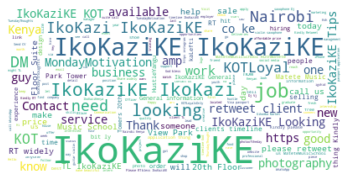

In [7]:
# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image of all tweets
wordcloud_all = WordCloud(stopwords=stopwords, background_color="white").generate(all_tweets)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis("off")
plt.show()

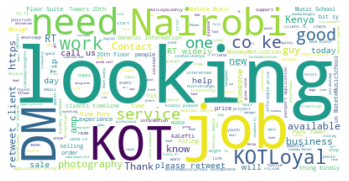

In [8]:
# Update stopwords list to include 'IkoKaziKe' and 'IkoKazi':
stopwords = set(STOPWORDS)
stopwords.update(["IkoKaziKe", "IkoKazi"])

# Generate a word cloud image of all tweets - WITHOUT THE WORDS 'IkoKaziKe' AND 'IkoKazi'
wordcloud_all_nohash = WordCloud(stopwords=stopwords, background_color="white").generate(all_tweets)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud_all_nohash, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
# Save the images:
wordcloud_all.to_file("wordcloud-all.png")
wordcloud_all_nohash.to_file("wordcloud-all-nohash.png")

In [11]:
# Function to create Kenyan Flag map
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [18]:
# Generate a word cloud image
mask = np.array(Image.open("kenya.png"))
transformed_flag_mask = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)
for i in range(len(mask)):
    transformed_flag_mask[i] = list(map(transform_format, mask[i]))


wordcloud_kenya = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=transformed_flag_mask).generate(all_tweets)

# create coloring from image
image_colors = ImageColorGenerator(transformed_flag_mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_kenya.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("wordcloud-kenya.png", format="png")

plt.show()

NotImplementedError: Gray-scale images TODO

<Figure size 504x504 with 0 Axes>